# Adaptive Intelligence COM3240

## Lab 4: PCA on the reduced MNIST database

### Learning Outcomes
- Gain further experience on PCA. 
- Apply PCA on a more complex dataset.
- Preparation for assignment 1.

### Exercise
Your task is to perform a Principle Component Analysis on a reduced data set of hand written digits, from the MNIST database http://yann.lecun.com/exdb/mnist/. The data set is available in csv format from the course web page page. The patterns pro vided are 28x28 images and you need reshape the vectors in the dataset in order to see an individual digit. To visualise multiple data points of a high dimensionality simultaneously, it is required to perform PCA and keep, for example, the four most important components and discard the others. This will allow you to plot 3D combinations of them and decide which is more informative for distinguishing the clusters that are formed. To facilitate visualisation, you may use the labels of the data and show only 5 digits in the graph (e.g 0, 2, 4, 7, 8). Use a different colour for every digit. 

**Note:** this is for didactic purposes; normally data are not labeled. 

You will need to produce the following:
1. A 3D figure of the transformed data with the 1st, 2nd and 3rd PC as axes.
2. A 3D figure of the transformed data with the 1st, 2nd and 4th PC as axes.
3. A 3D figure of the transformed data with the 2nd, 3rd and 4th PC as axes.
4. Also, comment on the most informative combination by pointing out the clusters of the data.

#### Further clarifications
For your implementation, you may of course use standard mathematical tools (such as finding the eigenvectors), but not a ready-made PCA module (though you may use it to compare results). In finding the principle components, please note that depending on the machine you are using or the accuracy of your calculations you may get the PC vectors with an opposite sign. This is not a problem as both solutions are totally equivalent.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
## load the dataset
train = np.genfromtxt ('digits/train.csv', delimiter=",")
trainlabels = np.genfromtxt ('digits/trainlabels.csv', delimiter=",")

[n,m]=np.shape(train)  # number of pixels and number of training data
#n = 784 = 28x28 pixels
#m = 5000 (images)

#### How to visualize a digit 

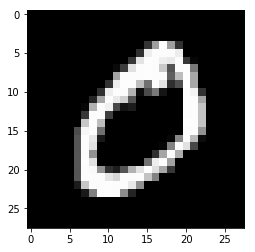

In [113]:
pixels = 28
i = 2 # 1 up to m

# reshapes the i-th vector with length n into a 28x28 array
image = np.reshape(train[:,1],(pixels,pixels),order="F")

# vizualize the image
plt.imshow(image, cmap = 'gray');

## Principal Component Analysis Algorithm

In [114]:
import numpy.matlib
from mpl_toolkits.mplot3d import Axes3D
import copy

#Normalise data and center around the means
def normalise(dat):
    denominators = np.sqrt(np.diag(dat.T.dot(dat)))
    return (dat/denominators).T

def center_data(dat):
    return dat-np.matlib.repmat(dat.mean(axis=0), np.shape(dat)[0],1)

def pca(centered_data, pc_count):
    #Find the covariance matrix using the centered data
    CVM = np.cov(centered_data.T)

    #Find eigenvalues and eigenvectors using the covariance matrix
    eigen_val, eigen_vec = np.linalg.eigh(CVM)

    #Select the eigenvectors with the highest eigenvalues (how many is equal to pc_count)
    i = np.argsort(eigen_val)[::-1]
    eigen_vec = eigen_vec[:,i]
    eigen_val = eigen_val[i]
    pc_vec = np.zeros((np.shape(centered_data)[1], pc_count))
    pc_vec[:,:pc_count] = eigen_vec[:,:pc_count]
    return pc_vec

def reduce_data(centered, dim):
    pc_vec = pca(centered, dim)
    return centered.dot(pc_vec)

class Cluster_Plotter:
    def __init__(self, dat, dim, lbl):
        self.centered = center_data(normalise(dat))
        self.dim = dim
        self.lbl = lbl
        self.reduced = reduce_data(self.centered, self.dim)
    
    def digit_collection(self, d):
        return (self.lbl==d).nonzero()
    
    def component(self, digit, axis):
        return self.reduced[digit,axis].flatten()
    
    def plot_clusters(self, digits, colours, axes, angle=0):
        fig = plt.figure(figsize = (10, 10))
        ax = fig.gca(projection = '3d')
        for i in range(len(digits)):
            digit = self.digit_collection(digits[i])
            x_ax = self.component(digit, axes[0]-1)
            y_ax = self.component(digit, axes[1]-1)
            z_ax = self.component(digit, axes[2]-1)
            ax.plot(x_ax,y_ax,z_ax,colours[i])
            ax.set_xlabel(str(axes[0]) + ' PC')
            ax.set_ylabel(str(axes[1]) + ' PC')
            ax.set_zlabel(str(axes[2]) + ' PC')
            ax.view_init(30, angle)
            plt.draw()
    
    def compute_similarities(self, digits, axes):
        components_by_digit = {}
        for d in digits:
            digit = self.digit_collection(d)
            x_ax = self.component(digit, axes[0]-1)
            y_ax = self.component(digit, axes[1]-1)
            z_ax = self.component(digit, axes[2]-1)
            components_by_digit[d] = (x_ax, y_ax, z_ax)
        similarities = {}
        for d in digits:
            other = copy.deepcopy(digits)
            other.remove(d)
            for igit in other:
                pair = frozenset((d, igit))
                if pair not in similarities:
                    
                    similarities[pair] = [numpy.linalg.norm(components_by_digit[d][v] - components_by_digit[igit][v]) for v in range(3)]
        return similarities  

def padded_pair(a, b):
    max_len = len(a) if len(a) > len(b) else len(b)
    return tuple([np.pad(c, (,max_len), mean)])

# Results
Plotting the data transformed by the specified triples of component axes for [the exercise](#Exercise).

In [115]:
cluster_plotter = Cluster_Plotter(train, 6, trainlabels)
digits  = [   0,    2,    4,    7,    8]
colours = ['r.', 'g.', 'm.', 'y.', 'b.']

(479,)
(488,)
(535,)
(550,)
(462,)


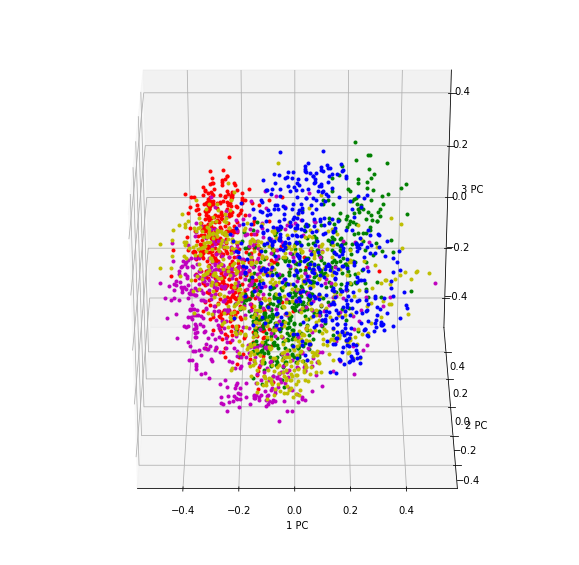

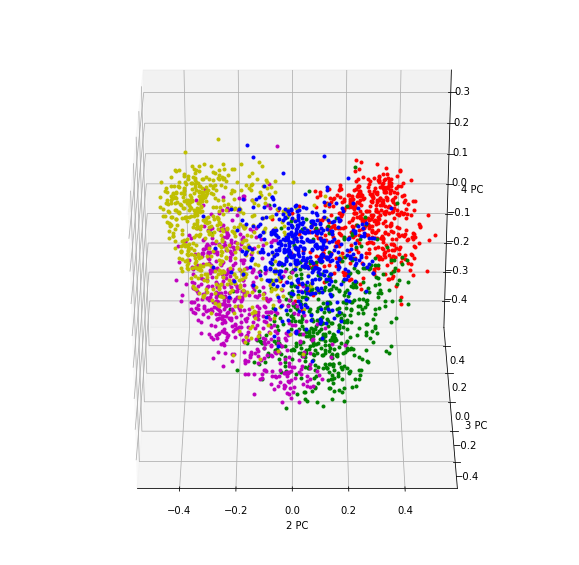

In [123]:
angle = 270
axes = [1,2,3] #1st, 2nd, 3rd
cluster_plotter.plot_clusters(digits, colours, axes, angle)
#print(cluster_plotter.compute_similarities(digits, axes))
print(cluster_plotter.component(cluster_plotter.digit_collection(0),0).shape)
print(cluster_plotter.component(cluster_plotter.digit_collection(2),0).shape)
print(cluster_plotter.component(cluster_plotter.digit_collection(4),0).shape)
print(cluster_plotter.component(cluster_plotter.digit_collection(7),0).shape)
print(cluster_plotter.component(cluster_plotter.digit_collection(8),0).shape)
axes = [1,2,4] #1st, 2nd, 4th
#cluster_plotter.plot_clusters(digits, colours, axes, angle)
axes = [2,3,4] #2nd, 3rd, 4th
cluster_plotter.plot_clusters(digits, colours, axes, angle)

# Collective Report A
Plotting the data transformed by the specified triples of component axes for Collective Report A (plots for 1st, 2nd, 3rd and 2nd, 3rd, 4th have already been plotted [above](#Results)).

In [ ]:
cluster_plotter.plot_clusters(digits, colours, [1,3,4],270) #1st, 3rd, 4th
cluster_plotter.plot_clusters(digits, colours, [2,4,5]) #2nd, 3rd, 5th
cluster_plotter.plot_clusters(digits, colours, [3,4,5]) #3rd, 4th, 5th